# Clustering Analysis (Part A)
A. Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters
using the elbow method.

Dataset Link: https://www.kaggle.com/datasets/uciml/iris

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["LOKY_MAX_CPU_COUNT"] = "4" 

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
# url = "https://www.kaggle.com/datasets/uciml/iris/download/Iris.csv"
iris = pd.read_csv("Iris.csv") 

In [4]:
# Drop unnecessary columns
iris_data = iris.drop(["Id", "Species"], axis=1)

In [5]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_data)

In [6]:
# Elbow Method to find optimal k
wcss = []  # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

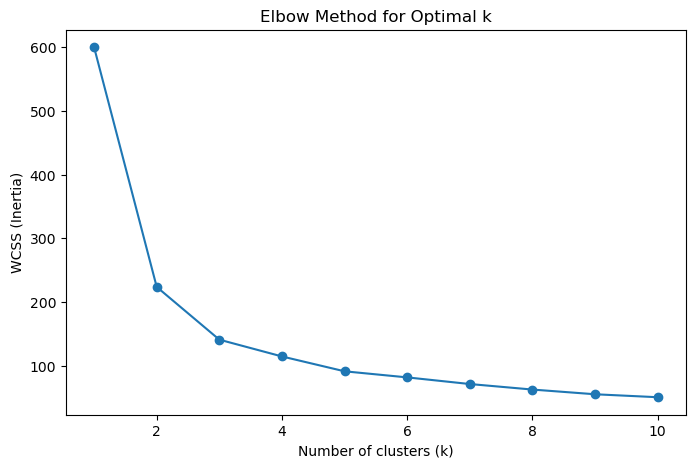

In [7]:
# Plot elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [8]:
# Apply KMeans with optimal k (say 3)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
iris['Cluster'] = kmeans.fit_predict(X_scaled)

In [9]:
# Display few results
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


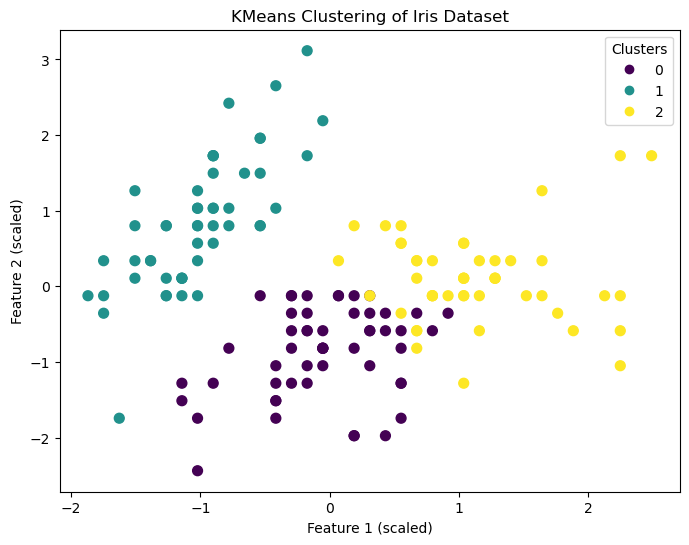

In [12]:
# Visualize clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_scaled[:,0], X_scaled[:,1], c=iris['Cluster'], cmap='viridis', s=50)
plt.title("KMeans Clustering of Iris Dataset")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()